/Users/mohsen/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


20578


<AxesSubplot:>

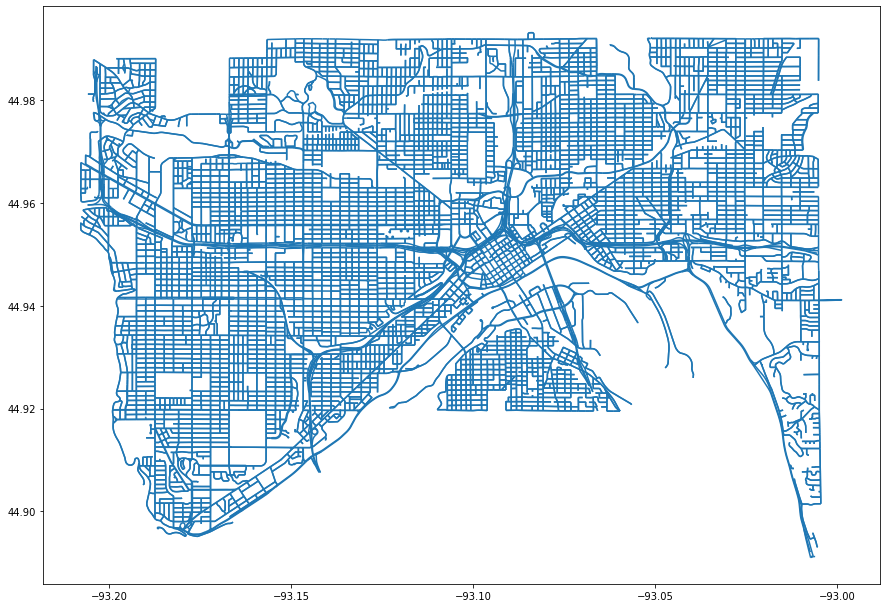

In [1]:
from IPython import get_ipython
import osmnx as ox 
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

place = 'St. Paul, MN'
graph = ox.graph_from_place(place, network_type= 'drive')

nodes, streets = ox.graph_to_gdfs(graph)
print(len(streets))
streets.plot(figsize=(15,15))




In [2]:
type(streets)

geopandas.geodataframe.GeoDataFrame

In [2]:

streets['oneway'] = streets['oneway'].astype(str)
streets['highway'] = streets['highway'].astype(str)
streets['maxspeed'] = streets['maxspeed'].astype(str)
streets['length'] = streets['length'].astype(str)
streets['lanes'] = streets['lanes'].astype(str)


st = streets[['oneway', 'highway', 'maxspeed', 'length', 'lanes', 'geometry']]
# streets.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
st.to_file(r'C:\Users\umn-ahmad178\Desktop\stpaulNet\stpaul.shp', driver='ESRI Shapefile')



In [12]:
import arcpy 

inputShp = r'C:\Users\umn-ahmad178\Desktop\stpaulNet\stpaul.shp'
outputShp = r'C:\Users\umn-ahmad178\Desktop\stpaulNet\stpaul_buffer_10m.shp'
distance = '10 Meters'

arcpy.Buffer_analysis(inputShp, outputShp, distance, dissolve_option='ALL', method='GEODESIC')

<Result 'C:\\Users\\umn-ahmad178\\Desktop\\stpaulNet\\stpaul_buffer_10m.shp'>